In [12]:
import math
import numpy as np
from scipy.integrate import quad
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [2]:
def dN(x):
    ''' Probability density function of standard normal random variable x. '''
    return math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi)

def N(d):
    ''' Cumulative density function of standard normal random variable x. '''
    return quad(lambda x: dN(x), -20, d, limit=50)[0]

def d1f(St, K, t, T, r, sigma):
    '''Black-Scholes-Merton d1 function'''
    d1 = (math.log(St / K) + (r + 0.5 * sigma ** 2)
          * (T - t)) / (sigma * math.sqrt(T - t))
    return d1

In [3]:
def BSM_delta(St, K, t, T, r, sigma):
    '''Black-Scholes-Merton DELTA of European call option'''
    d1 = d1f(St, K, t, T, r, sigma)
    delta = N(d1)
    return delta

In [10]:
def BSM_gamma(St, K, t, T, r, sigma):
    '''Black-Scholes-Merton GAMMA of European call option'''
    d1 = d1f(St, K, t, T, r, sigma)
    gamma = dN(d1) / (St * sigma * math.sqrt(T - t))
    return gamma

In [4]:
def BSM_theta(St, K, t, T, r, sigma):
    '''Black-Scholes-Merton THETA of European call option'''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    theta = -(St * dN(d1) * sigma / (2 * math.sqrt(T - t)) +
              r * K * math.exp(-r * (T - t)) * N(d2))
    return theta


In [5]:
def BSM_rho(St, K, t, T, r, sigma):
    '''Black-Scholes-Merton RHO of European call option'''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    rho = K * (T - t) * math.exp(-r * (T - t)) * N(d2)
    return rho

In [6]:
def BSM_vega(St, K, t, T, r, sigma):
    '''Black-Scholes-Merton VEGA of European call option'''
    d1 = d1f(St, K, t, T, r, sigma)
    vega = St * dN(d1) * math.sqrt(T - t)
    return vega


In [7]:
def plot_greeks(function, greek):
    # Model Parameters
    St = 100.0  # index level
    r = 0.05  # risk-less short rate
    sigma = 0.2  # volatility
    t = 0.0  # valuation date

    # Greek Calculations
    tlist = np.linspace(0.01, 1, 25)
    klist = np.linspace(80, 120, 25)
    V = np.zeros((len(tlist), len(klist)), dtype=np.float)
    for j in range(len(klist)):
        for i in range(len(tlist)):
            V[i, j] = function(St, klist[j], t, tlist[i], r, sigma)

    # 3D Plotting
    x, y = np.meshgrid(klist, tlist)
    fig = plt.figure(figsize=(9, 5))
    plot = p3.Axes3D(fig)
    plot.plot_wireframe(x, y, V)
    plot.set_xlabel('strike $K$')
    plot.set_ylabel('maturity $T$')
    plot.set_zlabel('%s(K, T)' % greek)

/tmp/ipykernel_54/1365182971.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)
/tmp/ipykernel_54/1365182971.py:19: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  plot = p3.Axes3D(fig)


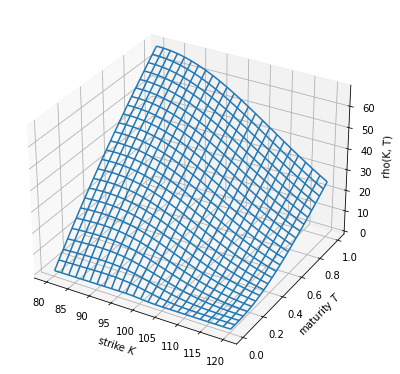

In [8]:
plot_greeks(BSM_rho, 'rho')

/tmp/ipykernel_54/1365182971.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)
/tmp/ipykernel_54/1365182971.py:19: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  plot = p3.Axes3D(fig)


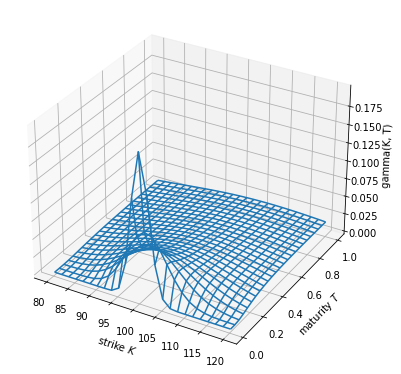

In [13]:
plot_greeks(BSM_gamma, 'gamma')